# Exploratory Data Analysis Part Two - Review Text Attributes

This notebook contains exploratory data analysis of the review text attributes with respect to ratings:

* Section 1 - import libraries and load data
* Section 2 - 

basic data cleaning
* Section 2 - number of words in a review
* Section 3 - average word length
* Section 4 - capitalization
* Section 5 - punctuation 
* Section 6 - emojis
* Section 7 - heatmap
* Section 8 - positive and negative reviews review titles and text
* Section 9 - positive and negative word clouds
* Sections 10 - most frequent positive and negative words by category

Datasets needed to run notebook:

* CombinedDataFrame.csv

Data saved to:

* Text_attributes.csv


# Section 1: Import libraries and load data

In [10]:
#!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import statsmodels as sm
from scipy import stats
import researchpy as rp
import re
import pickle
from collections import Counter
#import emot
#from emot.emo_unicode import UNICODE_EMO, EMOTICONS
#import emoji
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
nltk.download('punkt')
import gensim
%matplotlib inline
import seaborn as sns
sns.set()
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imoge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [125]:
# Bring in full review dataset including reviews with null location values
reviews = pd.read_csv("CombinedDataFrame.csv")

# Section 1: Examine the data and preprocessing

In [126]:
# Examine shape
reviews.shape

(10407, 15)

In [127]:
# Examine sample from df
reviews.sample(1)

,Unnamed: 0,Name,Category,Town,Type,Location,Contributions,ReviewDate,Title,Review,VisitDate,Rating,id,ReviewMonth,VisitMonth
5017,5017,Osca's,Food,Littlehampton,"Seafood, Restaurant","Felpham, United Kingdom",56,2019-06-07,Good grub,Only went in here for a portion of chips but t...,2019-05-01,4,4167,6,5


In [128]:
# Check datatypes
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10407 non-null  int64 
 1   Name           10407 non-null  object
 2   Category       10407 non-null  object
 3   Town           10407 non-null  object
 4   Type           10407 non-null  object
 5   Location       10042 non-null  object
 6   Contributions  10407 non-null  int64 
 7   ReviewDate     10407 non-null  object
 8   Title          10407 non-null  object
 9   Review         10407 non-null  object
 10  VisitDate      10407 non-null  object
 11  Rating         10407 non-null  int64 
 12  id             10407 non-null  int64 
 13  ReviewMonth    10407 non-null  int64 
 14  VisitMonth     10407 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 1.2+ MB


In [129]:
# Create new dataframe with just the review related data
reviews = reviews[["Category","Name","Title","Review","Rating","Town"]]

In [130]:
# Combine the title and review text column into one column - as data in title often useful
reviews['all_text'] = reviews['Title'] + ' ' + reviews['Review']
reviews.head(2)

,Category,Name,Title,Review,Rating,Town,all_text
0,Accommodation,Butlins,"Nice break, shame about the accommodation...",We booked our 3 night stay from 27-30 December...,4,Bognor,"Nice break, shame about the accommodation... W..."
1,Accommodation,Butlins,Horrendous noise Oyster Bay,In Oyster Bay. Oh dear.\n\nVery poor sound ins...,1,Bognor,Horrendous noise Oyster Bay In Oyster Bay. Oh ...


# Section 2: Number of Words Per Review

Does the number of words per review vary by rating?

## All Categories

In [131]:
# Maximum,minimum and mean length of string
print(reviews.all_text.str.len().max())
print(reviews.all_text.str.len().min())
print(reviews.all_text.str.len().mean())

11422
104
493.27933121937156


In [132]:
# Find number of words per review 
reviews["num_words"] = reviews['all_text'].str.split().apply(len)
reviews.head(2)

,Category,Name,Title,Review,Rating,Town,all_text,num_words
0,Accommodation,Butlins,"Nice break, shame about the accommodation...",We booked our 3 night stay from 27-30 December...,4,Bognor,"Nice break, shame about the accommodation... W...",1057
1,Accommodation,Butlins,Horrendous noise Oyster Bay,In Oyster Bay. Oh dear.\n\nVery poor sound ins...,1,Bognor,Horrendous noise Oyster Bay In Oyster Bay. Oh ...,214


In [133]:
# Examine one review
reviews.all_text.loc[21]

'Pub and kitchen Went to the pub and kitchen restaurant for dinner, I was seated straight away by Aaron who was nothing but professional I saw him running about the restaurant helping his fellow team members out he’s an all round star\nRead less'

In [134]:
# Check the number of words
reviews.num_words.loc[21]

44

In [135]:
# Look at stats for the number of words column
reviews["num_words"].describe()

count    10407.000000
mean        90.089267
std         91.510284
min         13.000000
25%         41.000000
50%         64.000000
75%        107.000000
max       2193.000000
Name: num_words, dtype: float64

In [136]:
# Median number of words per review
reviews["num_words"].median()

64.0

In [137]:
# visualize the distribution of number of words in a text - interactive chart
fig = px.histogram(reviews, x = "num_words", nbins = 100,title="Distribution of Number of Words In Documents")
fig.show()

In [138]:
# Plot the top accommodation establishments by number of reviews
def plot_est(category,title):
    fig, ax = plt.subplots()
    ax.hist(category.values,bins = 10, color = "xkcd:faded blue", alpha = 0.8)
    ax.set_title(title)
    ax.set_xlabel("Number of Words", fontsize = 10, labelpad = 10)
    ax.set_ylabel("Number of Reviews", fontsize = 10, labelpad = 10)
    ax.set_facecolor("white")
    plt.show()

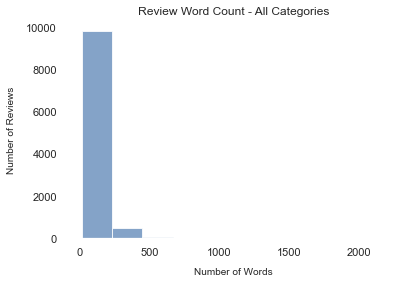

In [139]:
# Look at distribution of words per review (static chart)
plot_est(reviews["num_words"],"Review Word Count - All Categories")

In [140]:
# Skew of data
reviews.num_words.skew()

5.7541624829047855

In [141]:
# Which establishments have reviews greater than 1000 words
reviews[reviews["num_words"]>1000]["Name"]

0             Butlins
61            Butlins
111           Butlins
313           Butlins
385           Butlins
428           Butlins
459           Butlins
949    Bailiffs Court
Name: Name, dtype: object

In [142]:
# Ratings for those establishments with the longest reviews over 1000 characters
reviews[reviews["num_words"]>1000]["Rating"].value_counts()

4    3
5    2
1    1
2    1
3    1
Name: Rating, dtype: int64

In [143]:
# Ratings for those reviews with less than 200 words 
reviews[reviews["num_words"]<=200]["Rating"].value_counts()

5    6005
4    1813
3     746
1     616
2     444
Name: Rating, dtype: int64

Appears that longer reviews are rated lower than those that are shorter

In [144]:
# Median length of reviews by rating
num_words_by_rating_median = round(reviews.groupby("Rating")["num_words"].median())
num_words_by_rating_median

Rating
1     96
2    109
3     86
4     65
5     56
Name: num_words, dtype: int64

In [145]:
# Most common length of review
reviews["num_words"].mode()

0    41
dtype: int64

In [146]:
# Mean number of words by rating
num_words_by_rating = round(reviews.groupby("Rating")["num_words"].mean())
num_words_by_rating

Rating
1    134.0
2    141.0
3    121.0
4     94.0
5     75.0
Name: num_words, dtype: float64

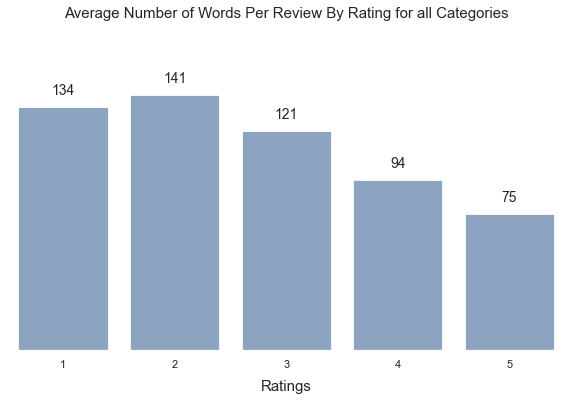

In [147]:
# Plot chart
a = num_words_by_rating.index
b = num_words_by_rating.values
b = b.astype(int)

plt.figure(figsize=(10,6))
ax= sns.barplot(a, b, color = "xkcd:faded blue", alpha = 0.8)
ax.set_facecolor("white")
ax.set_title("Average Number of Words Per Review By Rating for all Categories", fontsize = 15)
ax.set_xlabel('Ratings', fontsize = 15, labelpad = 10)
ax.set_yticklabels([])
ax.set_ylim(0,180)
rects = ax.patches
labels = b
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom',fontsize = 14)
plt.show();

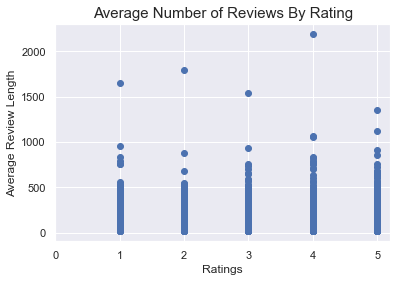

In [148]:
# Plot user contributions against rating value
plt.scatter(reviews.Rating,reviews.num_words)
plt.title("Average Number of Reviews By Rating", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Average Review Length")

In [149]:
# Boxplot excluding outliers
def box(x,y,title,ylabel):
    ax = sns.boxplot(x = x, y = y,showfliers = False, 
                     palette = ["lightsteelblue"])
    ax.set_facecolor("white")
    ax.set_ylabel(ylabel, fontsize = 12, labelpad = 10)
    ax.set_xlabel("Rating",fontsize = 12, labelpad = 10)
    ax = plt.title(title, fontsize = 13)
    plt.show()

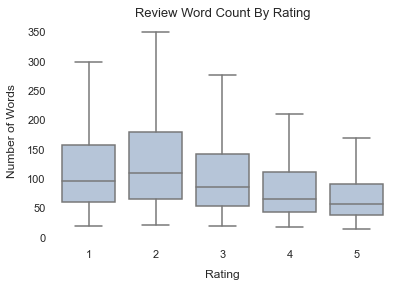

In [150]:
box(reviews["Rating"], reviews["num_words"],"Review Word Count By Rating","Number of Words")

Negative reviews appear to be longer than positive reviews based on average number or words per review

In [151]:
def stats_func(x,y):
    print("Shapiro Normality Test:",stats.shapiro(x))
    print("Levene Variance Test:",stats.levene(x[y == 1], x[y == 2], x[y == 3],x[y == 4],x[y == 5]))
    print("F-Test ANOVA:",stats.f_oneway(x[y == 1],x[y == 2], x[y == 3],x[y == 4],x[y == 5]))

In [152]:
stats_func(reviews["num_words"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.5947593450546265, pvalue=0.0)
Levene Variance Test: LeveneResult(statistic=38.40945608240186, pvalue=1.044629571137988e-31)
F-Test ANOVA: F_onewayResult(statistic=79.61467359297787, pvalue=1.3836878994058584e-65)


* H0 - population means the same, no relationship
* H1 - the population means are different so there is a relationship between the length of review and the rating
* Data is not normally distributed and does not have constant variance but the sample size is large so with p < 0.05, we can reject the null hypothesis of the F-test of population means being the same.

## By Category

Is there a difference in the mean review length by rating for accommodation, food and attractions?

### Accommodation

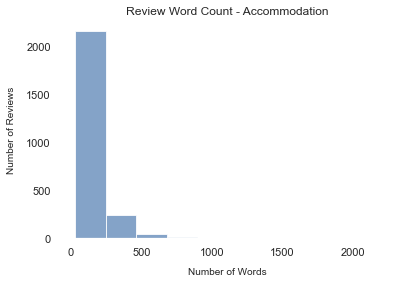

In [154]:
# Number of words per review for accommodation
hotel_num_words = reviews[reviews["Category"] == "Accommodation"]["num_words"]
plot_est(hotel_num_words,"Review Word Count - Accommodation")

In [155]:
# Basic statistics on number of words for hotel reviews
hotel_num_words.describe()

count    2473.000000
mean      133.190053
std       144.248764
min        32.000000
25%        53.000000
50%        85.000000
75%       153.000000
max      2193.000000
Name: num_words, dtype: float64

In [156]:
# Average number of words by rating
hotel_average_review = round(reviews[reviews["Category"] == "Accommodation"].groupby("Rating")["num_words"].mean())
hotel_average_review

Rating
1    186.0
2    175.0
3    175.0
4    146.0
5    107.0
Name: num_words, dtype: float64

* Most hotel reviews are under 200 words but there are a number of very long reviews.
* The lowest rated reviews appear to be longer on average than the highest rated

### Food

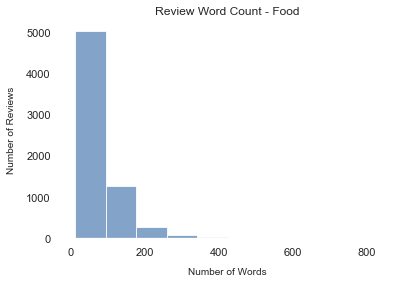

In [157]:
# Number of words per review for food reviews
food_num_words = reviews[reviews["Category"] == "Food"]["num_words"]
plot_est(food_num_words,"Review Word Count - Food")

In [158]:
# Basic statistics for number of words for restaurant reviews
food_num_words.describe()

count    6696.000000
mean       75.966547
std        60.754141
min        13.000000
25%        36.000000
50%        58.000000
75%        95.000000
max       834.000000
Name: num_words, dtype: float64

In [159]:
# Average number of words by rating
food_average_review = round(reviews[reviews["Category"] == "Food"].groupby("Rating")["num_words"].mean())
food_average_review

Rating
1    117.0
2    127.0
3     95.0
4     72.0
5     64.0
Name: num_words, dtype: float64

* Most restaurant reviews are under 100 words with again some longer reviews as outliers
* The lowest rated reviews are longer on average than the highest rated

### Attractions

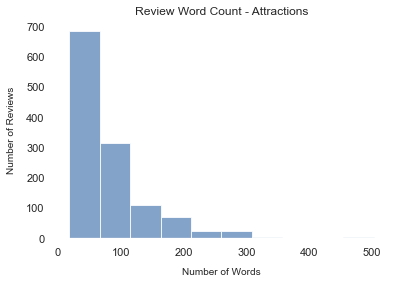

In [160]:
# Number of words per review for attractions
attract_num_words = reviews[reviews["Category"] == "Attractions"]["num_words"]
plot_est(attract_num_words,"Review Word Count - Attractions")

In [161]:
# Basic statistics for number of words for attraction reviews
attract_num_words.describe()

count    1238.000000
mean       80.378029
std        63.236408
min        18.000000
25%        38.000000
50%        61.000000
75%        98.000000
max       503.000000
Name: num_words, dtype: float64

In [162]:
# Average number of words by rating
attract_average_review = round(reviews[reviews["Category"] == "Attractions"].groupby("Rating")["num_words"].mean())
attract_average_review

Rating
1    113.0
2    150.0
3    103.0
4     81.0
5     75.0
Name: num_words, dtype: float64

* Most attraction reviews are under 50 words but there are some outliers, although the distribution is less skewed
* The lowest rated reviews are longer on average than the highest rated

In [163]:
# Create dataframe of the average review length by category
review_len = pd.concat([hotel_average_review,food_average_review,attract_average_review], axis = 1, ignore_index = True)
review_len.columns = ["Hotels","Attractions","Restaurants"]
review_len
#rest2.fillna(0)

,Hotels,Attractions,Restaurants
Rating,,,
1,186.0,117.0,113.0
2,175.0,127.0,150.0
3,175.0,95.0,103.0
4,146.0,72.0,81.0
5,107.0,64.0,75.0


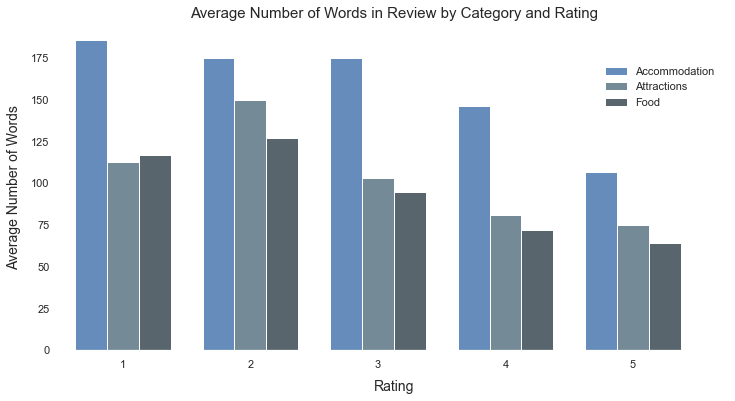

In [164]:
pos =list(range(len(review_len.iloc[:,0])))
width = 0.25 
fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor("white")
ax.bar(pos,review_len["Hotels"] , width,label=review_len.index[0], color = "xkcd:faded blue") 
ax.bar([p + width for p in pos],review_len["Restaurants"] ,width,label= review_len.index[1], color = "xkcd:bluish grey") 
ax.bar([p + width*2 for p in pos],review_len["Attractions"],width,label=review_len.index[2], color = "xkcd:slate grey") 
ax.set_title("Average Number of Words in Review by Category and Rating", fontsize = 15)
#ax.set_ylim(ylim)
ax.grid(axis = 'y', color = "grey", linestyle = ":", alpha = 0.8)
ax.set_ylabel("Average Number of Words", fontsize = 14,labelpad = 10)
ax.set_xlabel("Rating",fontsize = 14, labelpad = 10)
ax.set_xticks([p + 1 * width for p in pos])
ax.set_xticklabels(review_len.index)
ax.set_xlim(min(pos)-width, max(pos)+width*4)
ax.legend(['Accommodation','Attractions','Food'],loc='upper left', frameon = False, bbox_to_anchor = (0.8,0.9))
plt.show()

* Hotel reviews are longer for lower rated reviews than higher
* This is also the case for food and attractions reviews with the exception of the lowest one-star rating. 

# Section 3: Word Length

Does the number of characters per word vary by rating? Do people use longer or shorter words when writing bad reviews?

In [165]:
# Find number of chars per review excluding spaces
reviews["num_chars"] = reviews['all_text'].apply(lambda x: len(x) - x.count(" "))
reviews.head(1)

,Category,Name,Title,Review,Rating,Town,all_text,num_words,num_chars
0,Accommodation,Butlins,"Nice break, shame about the accommodation...",We booked our 3 night stay from 27-30 December...,4,Bognor,"Nice break, shame about the accommodation... W...",1057,4823


In [166]:
# Get mean word length and sort by descending
reviews["av_word_len"] = reviews["num_chars"]/reviews["num_words"]

In [167]:
reviews.head(2)

,Category,Name,Title,Review,Rating,Town,all_text,num_words,num_chars,av_word_len
0,Accommodation,Butlins,"Nice break, shame about the accommodation...",We booked our 3 night stay from 27-30 December...,4,Bognor,"Nice break, shame about the accommodation... W...",1057,4823,4.562914
1,Accommodation,Butlins,Horrendous noise Oyster Bay,In Oyster Bay. Oh dear.\n\nVery poor sound ins...,1,Bognor,Horrendous noise Oyster Bay In Oyster Bay. Oh ...,214,1066,4.981308


In [169]:
# Group average characters by rating
reviews.groupby("Rating")["av_word_len"].mean()

Rating
1    4.455776
2    4.459211
3    4.457587
4    4.553896
5    4.667694
Name: av_word_len, dtype: float64

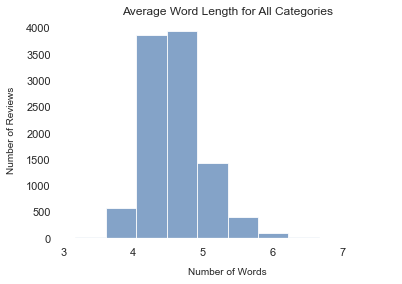

In [170]:
# Distribution of word average word length
plot_est(reviews.av_word_len,"Average Word Length for All Categories")

In [171]:
# Skew of data
reviews.av_word_len.skew()

0.9746497781618565

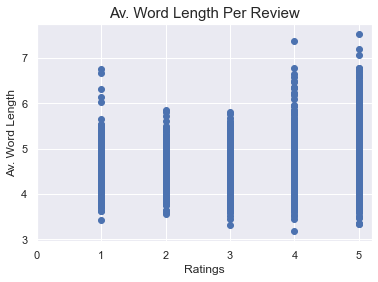

In [172]:
# Plot user contributions against rating value
plt.scatter(reviews.Rating,reviews.av_word_len)
plt.title("Av. Word Length Per Review", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Av. Word Length")

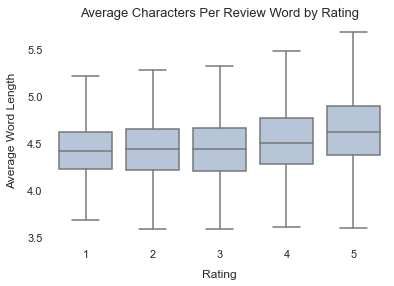

In [173]:
box(reviews["Rating"], reviews["av_word_len"],"Average Characters Per Review Word by Rating","Average Word Length")

In [174]:
stats_func(reviews["av_word_len"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.959528386592865, pvalue=3.3329684429064454e-35)
Levene Variance Test: LeveneResult(statistic=8.661793984760562, pvalue=5.789110003397653e-07)
F-Test ANOVA: F_onewayResult(statistic=57.97967573648604, pvalue=6.642893252670424e-48)


* Data is slightly positively skewed, with non constant variance but large sample size so F-test accepted
* Reject null hypothesis of having the same population mean at 5% significance, there does appear to be a relationship between the average word length of a review and the rating given with longer words being used for higher rated reviews,which is interesting.

# Section 4: Capitalization

Does the amount of capitalisation used vary with the rating given? Are unhappy or happy people likely to use more capitalisation?

In [175]:
# Find number of upper case characters - ie do people 'shout' if not happy?
reviews['uppercase'] = reviews["all_text"].apply(lambda x: sum(char.isupper() for char in x))
reviews["prop_uc"] = reviews["uppercase"]/reviews["num_chars"]

In [176]:
# Sort by highest value for prop_uc
reviews.sort_values(by = "prop_uc",ascending = False).head(2)

,Category,Name,Title,Review,Rating,Town,all_text,num_words,num_chars,av_word_len,uppercase,prop_uc
685,Accommodation,Avisford,OVERNIGHT STAY,What a treat we thought we were in for ...... ...,2,Arundel,OVERNIGHT STAY What a treat we thought we were...,227,910,4.008811,368,0.404396
290,Accommodation,Butlins,Family disaster.,PLEASE READ THIS EVERYONE. I visited here last...,1,Bognor,Family disaster. PLEASE READ THIS EVERYONE. I ...,53,235,4.433962,80,0.340426


In [177]:
# Look at one example - with negative rating
print(reviews["all_text"].iloc[290])

Family disaster. PLEASE READ THIS EVERYONE. I visited here last year. NOT family friendly VERY unsafe place. Man killed this week by 1 punch. I was in a similar incident last year. No help, no feeling of safety on site. PLEASE DO NOT VISIT THIS PLACE IT SHOULD BE CLOSED DOWN.
Read less


In [178]:
# Example with positive rating
print(reviews["all_text"].iloc[6182])

AMAZING FOOD AND PRESENTATION Went for breakfast with a friend, both had the full English with scrambled egg and FREE TEA OR COFFEE.
£8 EACH! Cooked to perfection, can't fault aginthing. Even better the latte art. Well done dawid!

MUSTARDS WILL DO AMAZING


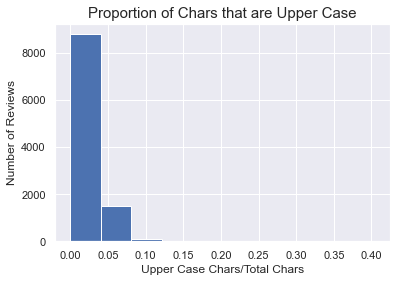

In [179]:
# Plot histogram of frequency of review size by number of words
plt.hist(reviews.prop_uc,bins = 10)
plt.xlabel("Upper Case Chars/Total Chars")
plt.ylabel("Number of Reviews")
ax = plt.title("Proportion of Chars that are Upper Case", fontsize = 15)

In [180]:
reviews.prop_uc.skew()

5.473242007877372

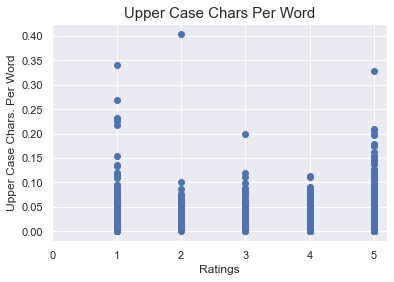

In [181]:
# Plot user contributions against rating value
plt.scatter(reviews.Rating,reviews.prop_uc)
plt.title("Upper Case Chars Per Word", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Upper Case Chars. Per Word")

In [182]:
# Stats for the proportion of upper case
reviews['prop_uc'].describe()

count    10407.000000
mean         0.029728
std          0.016175
min          0.000000
25%          0.020779
50%          0.026961
75%          0.035242
max          0.404396
Name: prop_uc, dtype: float64

In [185]:
# Average number of words by rating
uc_by_rating = reviews.groupby("Rating")["prop_uc"].mean()
uc_by_rating

Rating
1    0.029270
2    0.025232
3    0.025790
4    0.028154
5    0.031233
Name: prop_uc, dtype: float64

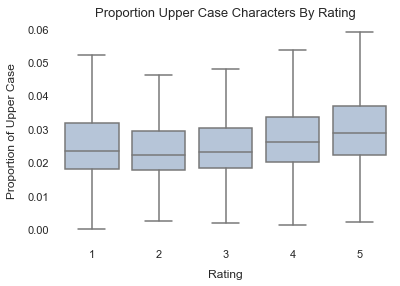

In [186]:
# Boxplot of the data
box(reviews["Rating"],reviews["prop_uc"],"Proportion Upper Case Characters By Rating","Proportion of Upper Case")

In [187]:
stats_func(reviews["prop_uc"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.6808193922042847, pvalue=0.0)
Levene Variance Test: LeveneResult(statistic=6.198034841056722, pvalue=5.685411615170539e-05)
F-Test ANOVA: F_onewayResult(statistic=19.733323701227658, pvalue=3.929649358610744e-16)


* Data is heavily positively skewed, non-constant variance but large sample size.
* F-test ANOVA significant at 5% so reject null hypothesis that two or more groups have the same mean, suggests there is some relationship between the amount of capitalized letters used and the rating given to a review 
* The slight bow shape indicates capitalisation is used more for the most positive and negative reviews perhaps reflecting stronger sentimen.

# Section 5: Punctuation

Does the amount of punctuation vary with rating given? Do happy or unhappy people use more or less punctuation?

In [188]:
# Find amount of punctuation and express as a proportion of all characters in a string
# includes [!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~]
import string
reviews['special_chars'] = reviews["all_text"].apply(lambda x: sum(char in string.punctuation for char in x))
reviews["prop_sc"] = reviews["special_chars"]/reviews["num_chars"]

In [189]:
# Sort by highest value for prop_uc
reviews.sort_values(by = 'prop_sc',ascending = False).head(2)

,Category,Name,Title,Review,Rating,Town,all_text,num_words,num_chars,av_word_len,uppercase,prop_uc,special_chars,prop_sc
5094,Food,The Beresford,A good place to visit,Excellent carvery ................... apart fr...,4,Bognor,A good place to visit Excellent carvery .........,26,134,5.153846,3,0.022388,24,0.179104
6500,Food,Partners Café,Paddy,"Amazing breakfasts & service. Local favorite,a...",5,Arundel,Paddy Amazing breakfasts & service. Local favo...,13,98,7.538462,3,0.030612,16,0.163265


In [190]:
# Example review - positive
print(reviews["all_text"].iloc[5094])

A good place to visit Excellent carvery ................... apart from the wafer thin meat ! Very good ambience and atmosphere ( surely necessary wherever ! ).


In [191]:
# Example review - positive
print(reviews["all_text"].iloc[10229])

Pre dinner drinks Popped in here for a drink before dinner in the village....lovely ambience...nice & busy....good choice of wine & beer....friendly efficient service....recommend


In [192]:
# Example review - negative
print(reviews["all_text"].iloc[3117])

Don't know what to say So our story here is a short one, family of 5 got seated quickly given menus then ......... waiting...... waiting.......waiting ........,.gave up and left. So can't comment on the food but if you can't order any then I guess that says all you need to know. We left for a lovely local restaurant the Arun view, there you actually get served and get to eat .


In [193]:
# Statistical summary
reviews['prop_sc'].describe()

count    10407.000000
mean         0.027265
std          0.012736
min          0.000000
25%          0.019410
50%          0.025862
75%          0.033333
max          0.179104
Name: prop_sc, dtype: float64

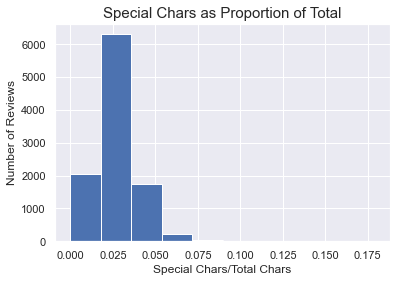

In [194]:
# Plot histogram of frequency of review size by number of words
plt.hist(reviews.prop_sc,bins = 10)
plt.xlabel("Special Chars/Total Chars")
plt.ylabel("Number of Reviews")
ax = plt.title("Special Chars as Proportion of Total", fontsize = 15)

In [195]:
reviews.prop_sc.skew()

1.4978246323743518

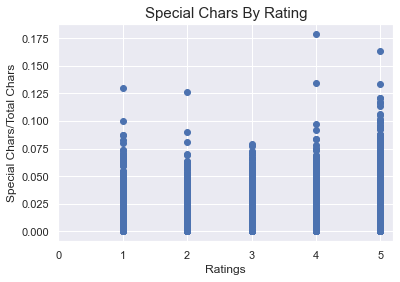

In [196]:
# Plot user contributions against rating value
plt.scatter(reviews.Rating,reviews.prop_sc)
plt.title("Special Chars By Rating", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Special Chars/Total Chars")

In [197]:
# Average number of words by rating
num_punct_by_rating = reviews.groupby("Rating")["prop_sc"].mean()
num_punct_by_rating

Rating
1    0.028261
2    0.026451
3    0.026012
4    0.026636
5    0.027593
Name: prop_sc, dtype: float64

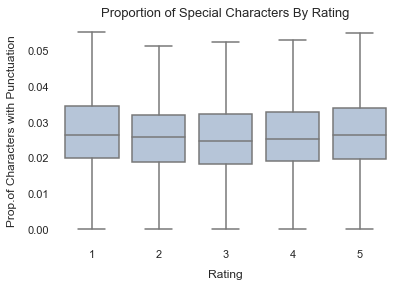

In [198]:
box(reviews["Rating"],reviews["prop_sc"],"Proportion of Special Characters By Rating","Prop.of Characters with Punctuation")

In [199]:
stats_func(reviews["prop_sc"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.9408103227615356, pvalue=8.599488415868537e-41)
Levene Variance Test: LeveneResult(statistic=1.5601460058462973, pvalue=0.182069715751772)
F-Test ANOVA: F_onewayResult(statistic=4.263301772269126, pvalue=0.0019092575612727055)


* Data is postively skewed, with constant variance
* F-test ANOVA significant at 5% so reject null hypothesis that two or more groups have the same mean, suggests there is some relationship between the amount of punctuation
* The slight bow shape indicates punctuation is used more for the most positive and negative reviews, again perhaps reflecting strength of emotion.

# Section 6: Emojis and Emoticons

Sentiment is increasingly contained in emojis and emoticons.

* Does the number of emojis used per review vary with rating?


In [200]:
# Uncomment and run to get list of emoji icons
# emoji.EMOJI_ALIAS_UNICODE

In [201]:
# Sample text
test_post = reviews["all_text"].iloc[4]
test_post

'Butlins xmas Went for Xmas break for 4 nights,included seeing Santa,Elton John tribute, sleeping beauty etc. The staff were very friendly,The Beachcomber Inn was brill,the food was delicious the service/staff were great,so ate there twice,my child asked if they deliver. Well done Butlins 😃\nRead less'

In [202]:
# Function to find emojis in text
def find_emojies(text):
    EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])"
  )
    emoji = re.findall(EMOJI_PATTERN, text)
    return emoji

In [203]:
# Function to find emoticons
def find_emoticons (text):
    return emot.emoticons(text)

In [204]:
# Apply to dataframe
reviews["Emoji"] = reviews["all_text"].apply(find_emojies)

In [205]:
# Fill zeros for nan entries where there are no emojis
reviews["Emoji"]= reviews["Emoji"].apply(lambda x: np.nan if len(x)==0 else x)
reviews["Emoji"] = reviews["Emoji"].fillna(0)

In [206]:
# Count emojis
reviews["Emoji_count"] = reviews["Emoji"].apply(lambda x:len(x) if isinstance(x,list) else 0)                                                               

In [207]:
# Number of emojis used
reviews["Emoji_count"].value_counts()

0    10277
1       98
2       19
3        8
4        4
5        1
Name: Emoji_count, dtype: int64

In [208]:
# Proportion of emojis of words used in a review
reviews["Emoji_prop"] = reviews["Emoji_count"]/reviews["num_words"]

In [209]:
# Sort to see if there are outliers
reviews["Emoji_prop"].sort_values(ascending = False)

3690     0.166667
9569     0.125000
3156     0.066667
835      0.058824
9711     0.051282
           ...   
3517     0.000000
3518     0.000000
3519     0.000000
3520     0.000000
10406    0.000000
Name: Emoji_prop, Length: 10407, dtype: float64

In [210]:
# Mean emoji proportion by rating
emoji_by_rating = reviews.groupby("Rating")["Emoji_prop"].mean()
emoji_by_rating

Rating
1    0.000211
2    0.000021
3    0.000083
4    0.000191
5    0.000295
Name: Emoji_prop, dtype: float64

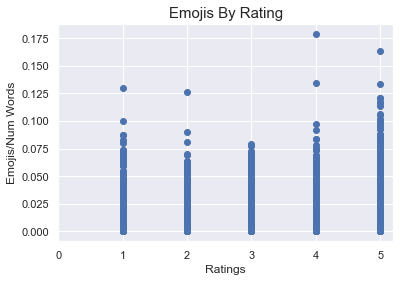

In [211]:
# Plot emojis as proportion of words against rating value
plt.scatter(reviews.Rating,reviews.prop_sc)
plt.title("Emojis By Rating", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Emojis/Num Words")

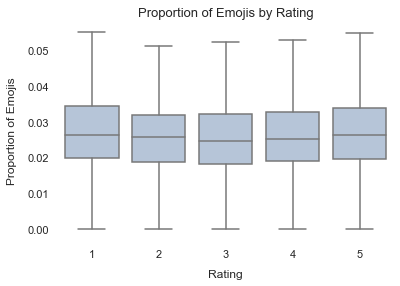

In [212]:
box(reviews["Rating"], reviews["prop_sc"],"Proportion of Emojis by Rating", "Proportion of Emojis")

In [213]:
stats_func(reviews["Emoji_prop"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.05690497159957886, pvalue=0.0)
Levene Variance Test: LeveneResult(statistic=1.1404233793107579, pvalue=0.33543107436455927)
F-Test ANOVA: F_onewayResult(statistic=1.1404233793107583, pvalue=0.33543107436455927)


No statistically significant relationship between the number of emojis used by a reviewer as a proportion of all the words in the review and the rating that is given. 

* Most emojis are positive most likely due to the skew towards positive ratings in the data
* There is no statistically significant relationship between the number of emojis used and the rating given
* The presence of emojis was also examined but removed from notebook as there was no statistically significant relationship between the use of emojis or otherwise observed.

In [214]:
reviews.to_csv("Text_attributes.csv")

# Section 7: Heatmap

In [215]:
reviews.columns

Index(['Category', 'Name', 'Title', 'Review', 'Rating', 'Town', 'all_text',
       'num_words', 'num_chars', 'av_word_len', 'uppercase', 'prop_uc',
       'special_chars', 'prop_sc', 'Emoji', 'Emoji_count', 'Emoji_prop'],
      dtype='object')

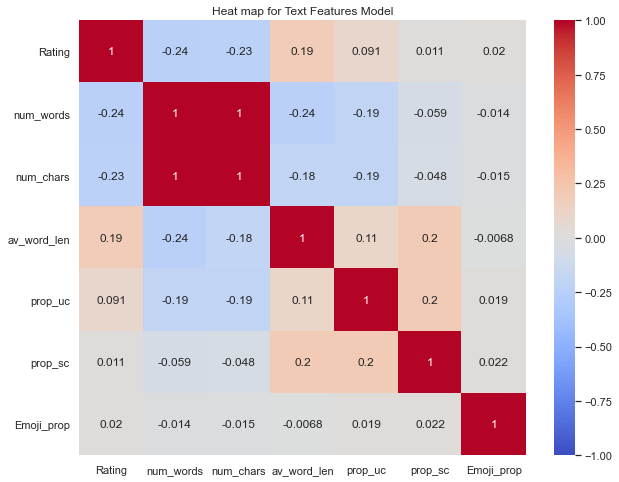

In [216]:
# Heatmap to show relationships
correlation_df = reviews.drop(columns = ["Category","Name","Title","Review","Town","all_text",
                                         "uppercase","special_chars","Emoji","Emoji_count"],axis= 1)
cor_mat = correlation_df.corr()
top_corr_features = cor_mat.index
plt.figure(figsize=(10,8))
plt.title("Heat map for Text Features Model")
#plot heat map
g=sns.heatmap(correlation_df[top_corr_features].corr(),annot=True,vmin=-1, cmap='coolwarm')

* The heatmap shows a positive correlation between rating and the average word length and a negative relationship with the number of words used in the review - positive reviews use longer words and negative reviews have more words on average
* The number of characters and the number of words are collinear, so one not both should be included in any model. 
* The rest of the features have very weak positive relationships with ratings. 
* Of interest is the correlation between the proportion of special characters used and the proportion of upper-case characters, suggesting capitalization and punctuation such as perhaps exclamation marks often occur together and they are both correlated with the average word length.

# Section 8: Extract Positive and Negative Review Titles and Text

In [217]:
# Get the shape of the combined reviews dataframe
reviews.shape

(10407, 17)

In [108]:
# Save out file
#reviews.to_csv("Reviews.csv")

In [218]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 1.0]["Title"].sample(5)

1772                      Awful!
8696               Awful Meal :(
4239    Disappointing experience
3681                   RESTURANT
5082                    Terrible
Name: Title, dtype: object

In [219]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 2.0]["Title"].sample(5)

7191    Nice peaceful afternoon 
3471         Would not recommend
6584                  Overpriced
3863      Three visits, all poor
4362           Very disappointed
Name: Title, dtype: object

In [220]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 3.0]["Title"].sample(5)

4464                          Ambiance is'nt everything
6372                                               Pink
2143                                            Funeral
10054                                      Stones ....!
1892     No elevator, no air conditioning, average stay
Name: Title, dtype: object

In [221]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 4.0]["Title"].sample(5)

508     With friends and family. Long weekend plus day...
1319           Stayed here whilst on business in the area
3350                                      Nice restaurant
1131                                              Lovely 
6431                                        Very pleasant
Name: Title, dtype: object

In [222]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 5.0]["Title"].sample(5)

8240    Very good service with best food
3687             Monday 30 December 2019
7778              Belly Busting Portions
954            An Experience to Remember
1828                          Mini break
Name: Title, dtype: object

In [223]:
# Split into positive and negative based on ratings
reviews['Score'] = reviews['Rating'].apply(lambda x: "0" if x > 2 else "1")

In [224]:
reviews.shape

(10407, 18)

In [225]:
# Filter to only those rows with Rating not equal to 3 into a new dataframe
reviews_filtered = reviews[reviews["Rating"] != 3]
reviews_filtered.shape

(9530, 18)

In [226]:
# Save to CSV
#reviews2.to_csv("Scored_Reviews.csv",index = False)

In [227]:
# Check positive versus non-positive rating scores 
reviews_filtered.Score.value_counts()

0    8229
1    1301
Name: Score, dtype: int64

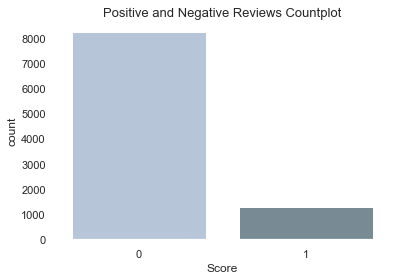

In [228]:
# Coutnplot of the positive and negative scores for all reviews - negative reviews are the minority class since they are the
# class we are interested in
figure, ax = plt.subplots()
ax = sns.countplot("Score",data = reviews_filtered, palette = ["lightsteelblue","xkcd:bluish grey"])
ax.set_facecolor("White")
ax.set_title("Positive and Negative Reviews Countplot", fontsize = 13)
plt.show()

In [229]:
# Average number of words by score
reviews_filtered.groupby("Score")["num_words"].mean()

Score
0     79.409892
1    136.797079
Name: num_words, dtype: float64

In [230]:
# Drop unnecessary column
reviews_filtered = reviews_filtered.drop(columns = ["num_words"], axis = 1)

In [231]:
# Join the Title and Text together into a single column called 'all_text'
# combine title and text together
reviews_filtered['all_text'] = reviews_filtered['Title'] + ' ' + reviews_filtered['Review']
reviews_filtered.head(1)

,Category,Name,Title,Review,Rating,Town,all_text,num_chars,av_word_len,uppercase,prop_uc,special_chars,prop_sc,Emoji,Emoji_count,Emoji_prop,Score
0,Accommodation,Butlins,"Nice break, shame about the accommodation...",We booked our 3 night stay from 27-30 December...,4,Bognor,"Nice break, shame about the accommodation... W...",4823,4.562914,46,0.009538,152,0.031516,0,0,0.0,0


In [232]:
# Examine original text of review and title - as some reviews only have titles and the titles contain information
print(reviews_filtered["all_text"][4])

Butlins xmas Went for Xmas break for 4 nights,included seeing Santa,Elton John tribute, sleeping beauty etc. The staff were very friendly,The Beachcomber Inn was brill,the food was delicious the service/staff were great,so ate there twice,my child asked if they deliver. Well done Butlins 😃
Read less


In [233]:
# Get the text of reviews within each category
text_hotels = reviews_filtered[reviews_filtered["Category"] == "Accommodation"] 
text_rests= reviews_filtered[reviews_filtered["Category"] == "Food"] 
text_attract = reviews_filtered[reviews_filtered["Category"] == "Attractions"] 

In [234]:
text_hotels.head(2)

,Category,Name,Title,Review,Rating,Town,all_text,num_chars,av_word_len,uppercase,prop_uc,special_chars,prop_sc,Emoji,Emoji_count,Emoji_prop,Score
0,Accommodation,Butlins,"Nice break, shame about the accommodation...",We booked our 3 night stay from 27-30 December...,4,Bognor,"Nice break, shame about the accommodation... W...",4823,4.562914,46,0.009538,152,0.031516,0,0,0.0,0
1,Accommodation,Butlins,Horrendous noise Oyster Bay,In Oyster Bay. Oh dear.\n\nVery poor sound ins...,1,Bognor,Horrendous noise Oyster Bay In Oyster Bay. Oh ...,1066,4.981308,32,0.030019,39,0.036585,0,0,0.0,1


In [235]:
# Find number of words in the total of all reviews by category
text_h = " ".join(review for review in text_hotels.all_text)
print ("There are {} words in the combination of all hotel reviews.".format(len(text_h)))
text_r = " ".join(review for review in text_rests.all_text)
print ("There are {} words in the combination of all restaurant reviews.".format(len(text_r)))
text_a = " ".join(review for review in text_attract.all_text)
print ("There are {} words in the combination of all attraction reviews.".format(len(text_a)))
text_all = " ".join(review for review in reviews_filtered.all_text)
print ("There are {} words in the combination of all reviews.".format(len(text_all)))

There are 1535264 words in the combination of all hotel reviews.
There are 2530532 words in the combination of all restaurant reviews.
There are 504246 words in the combination of all attraction reviews.
There are 4570044 words in the combination of all reviews.


# Section 9: Positive and Negative Word Clouds

In [236]:
# Get positive and negative reviews for each category and put into separate dataframes
hotels_positive = text_hotels[text_hotels["Score"] == "0"]
rests_positive = text_rests[text_rests["Score"] == "0"]
attract_positive = text_attract[text_attract["Score"] == "0"]

# Extract negative review titles for each category of establishment
hotels_negative = text_hotels[text_hotels["Score"] == "1"]
rests_negative = text_rests[text_rests["Score"] == "1"]
attract_negative = text_attract[text_attract["Score"] == "1"]

In [237]:
# Join all positive reviews together
all_text_h_positive = " ".join(review for review in hotels_positive.all_text)
all_text_r_positive = " ".join(review for review in rests_positive.all_text)
all_text_a_positive = " ".join(review for review in attract_positive.all_text)

# Join all negative reviews together
all_text_h_negative = " ".join(review for review in hotels_negative.all_text)
all_text_r_negative = " ".join(review for review in rests_negative.all_text)
all_text_a_negative = " ".join(review for review in attract_negative.all_text)

In [238]:
# Amend stopwords to remove words scraped from online review in error
stopwords = list(STOPWORDS)
stopwords.append("read")
stopwords.append("less")
stopwords.append("more")
stopwords = set(stopwords)

In [239]:
# Function to generate wordcloud
def gen_wordcloud(df):
    wc = WordCloud(stopwords=stopwords, background_color="white").generate(df)
    return wc

In [240]:
# Generate wordclouds
wordcloud_h_positive = gen_wordcloud(all_text_h_positive)
wordcloud_r_positive = gen_wordcloud(all_text_r_positive)
wordcloud_a_positive = gen_wordcloud(all_text_a_positive)
wordcloud_h_negative = gen_wordcloud(all_text_h_negative)
wordcloud_r_negative = gen_wordcloud(all_text_r_negative)
wordcloud_a_negative = gen_wordcloud(all_text_a_negative)

## Accommodation

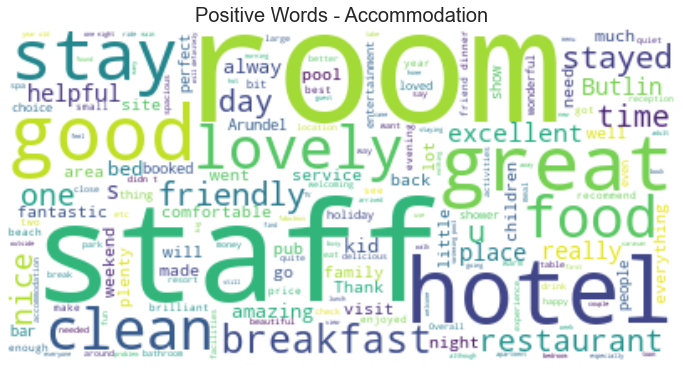

In [241]:
# Display the generated image: Hotels positive words
plt.figure(figsize=[12,10])
plt.title("Positive Words - Accommodation", fontsize = 20)
plt.imshow(wordcloud_h_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

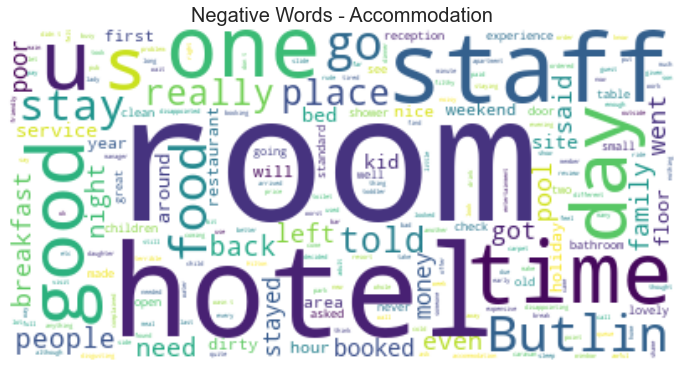

In [242]:
# Display the generated image: Hotels Negative words
plt.figure(figsize=[12,10])
plt.title("Negative Words - Accommodation", fontsize = 20)
plt.imshow(wordcloud_h_negative,interpolation='bilinear')
plt.axis("off")
plt.show()

## Food

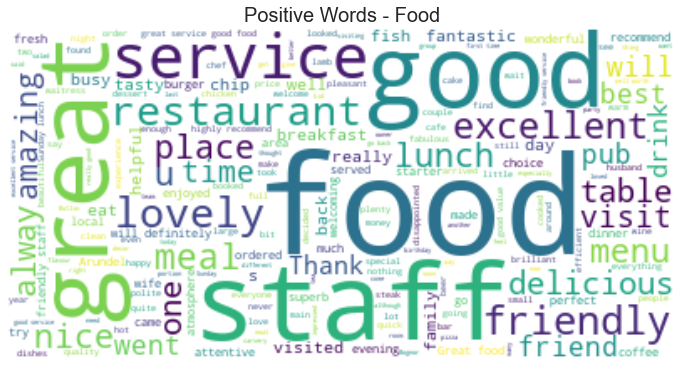

In [243]:
# Display the generated image: Food positive reviews
plt.figure(figsize=[12,10])
plt.title("Positive Words - Food", fontsize = 20)
plt.imshow(wordcloud_r_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

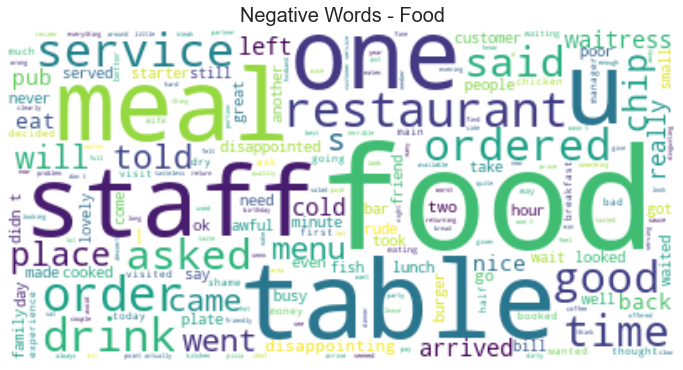

In [244]:
# Display the generated image: Food negative reviews
plt.figure(figsize=[12,10])
plt.title("Negative Words - Food", fontsize = 20)
plt.imshow(wordcloud_r_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

## Attractions 

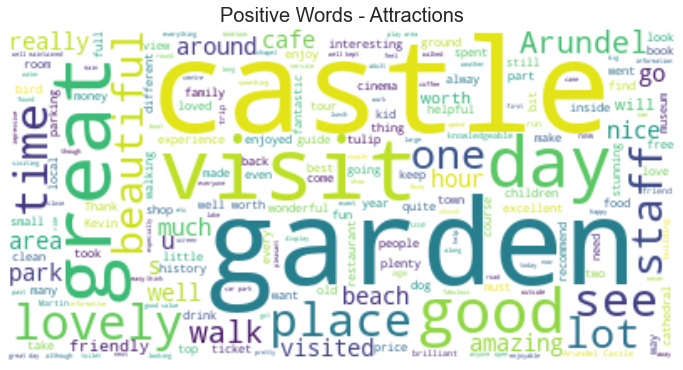

In [245]:
# Display the generated image: Positive attraction reviews
plt.figure(figsize=[12,10])
plt.title("Positive Words - Attractions", fontsize = 20)
plt.imshow(wordcloud_a_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

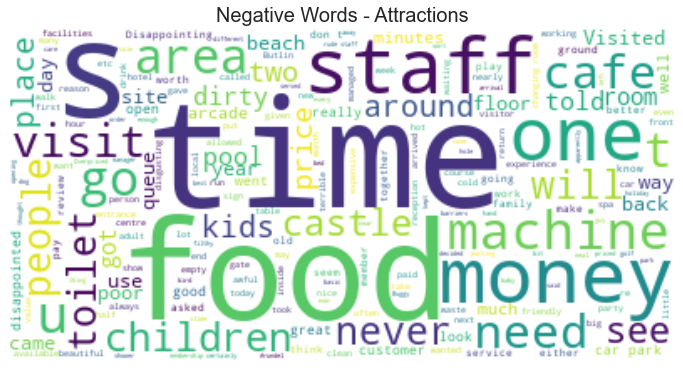

In [246]:
# Display the generated image: Negative attraction reviews
plt.figure(figsize=[12,10])
plt.title("Negative Words - Attractions", fontsize = 20)
plt.imshow(wordcloud_a_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

# Section 10: Word Frequencies

## Accommodation

In [247]:
# Top positive words for hotel reviews
all_text_h_positive = all_text_h_positive.lower()
words_h_positive = [word for word in all_text_h_positive.split() if word not in stopwords]
word_count_h_positive = collections.Counter(words_h_positive)
top_h_positive = word_count_h_positive.most_common()
top_five_h_positive = top_h_positive[0:6]

for tup in top_five_h_positive:
    if tup[0] == "-":
        top_five_h_positive.remove(tup)

print(top_five_h_positive)

[('room', 1176), ('staff', 1134), ('good', 1121), ('great', 1106), ('hotel', 951), ('stay', 859)]


In [248]:
# Top negative words for hotel reviews
all_text_h_negative = all_text_h_negative.lower()
words_h_negative = [word for word in all_text_h_negative.split() if word not in stopwords]
word_count_h_negative = collections.Counter(words_h_negative)
top_h_negative = word_count_h_negative.most_common()
top_five_h_negative = top_h_negative[0:6]

for tup in top_five_h_negative:
    if tup[0] == "-":
        top_five_h_negative.remove(tup)

print(top_five_h_negative)

[('room', 321), ('staff', 199), ('one', 149), ('hotel', 147), ('us', 146)]


## Food

In [249]:
# Top positive words for food reviews
all_text_r_positive = all_text_r_positive.lower()
words_r_positive = [word for word in all_text_r_positive.split() if word not in stopwords]
word_count_r_positive = collections.Counter(words_r_positive)
top_r_positive = word_count_r_positive.most_common()
top_five_r_positive = top_r_positive[0:6]

for tup in top_five_r_positive:
    if tup[0] == "-":
        top_five_r_positive.remove(tup)

print(top_five_r_positive)

[('food', 3833), ('great', 2841), ('good', 2643), ('staff', 1963), ('lovely', 1882), ('service', 1837)]


In [250]:
# Top negative words for food reviews
all_text_r_negative = all_text_r_negative.lower()
words_r_negative = [word for word in all_text_r_negative.split() if word not in stopwords]
word_count_r_negative = collections.Counter(words_r_negative)
top_r_negative = word_count_r_negative.most_common()
top_five_r_negative = top_r_negative[0:6]

for tup in top_five_r_negative:
    if tup[0] == "-":
        top_five_r_negative.remove(tup)

print(top_five_r_negative)

[('food', 756), ('staff', 360), ('us', 321), ('one', 317), ('service', 311), ('table', 290)]


## Attractions

In [251]:
# Top positive words for attraction reviews
all_text_a_positive = all_text_a_positive.lower()
words_a_positive = [word for word in all_text_a_positive.split() if word not in stopwords]
word_count_a_positive = collections.Counter(words_a_positive)
top_a_positive = word_count_a_positive.most_common()
top_five_a_positive = top_a_positive[0:6]

for tup in top_five_a_positive:
    if tup[0] == "-":
        top_five_a_positive.remove(tup)

print(top_five_a_positive)

[('great', 484), ('castle', 450), ('well', 381), ('good', 343), ('day', 328), ('lovely', 324)]


In [252]:
# Top negative words for attraction reviews
all_text_a_negative = all_text_a_negative.lower()
words_a_negative = [word for word in all_text_a_negative.split() if word not in stopwords]
word_count_a_negative = collections.Counter(words_a_negative)
top_a_negative = word_count_a_negative.most_common()
top_five_a_negative = top_a_negative[0:11]

for tup in top_five_a_negative:
    if tup[0] == "-":
        top_five_a_negative.remove(tup)

print(top_five_a_negative)

[('staff', 28), ('one', 22), ('food', 22), ('go', 19), ('time', 18), ('money', 18), ('us', 17), ('never', 16), ('will', 16), ('car', 16), ('see', 15)]
